This notebook is for using data exploration and visualization functions for understanding the data.

In [3]:
import os
import sys
from pathlib import Path

# Current working directory is likely /teamspace/studios/this_studio/notebooks
current_dir = Path.cwd()

# The project root is one level up from 'notebooks', i.e., /teamspace/studios/this_studio
project_root = current_dir.parent

# Add project root and src to the Python path, if needed
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

src_dir = project_root / 'src'
if str(src_dir) not in sys.path:
    sys.path.append(str(src_dir))

# Construct the data directory path
data_dir = project_root / 'data' / 'nih_chest_xray'

print(f"Project root: {project_root}")
print(f"Data directory: {data_dir}")

# Check data directory
if not data_dir.exists():
    print(f"Warning: Data directory not found at {data_dir}")
else:
    print(f"Data directory found at {data_dir}")
    # Optionally list the contents
    # !ls {data_dir}



Project root: /teamspace/studios/this_studio
Data directory: /teamspace/studios/this_studio/data/nih_chest_xray
Data directory found at /teamspace/studios/this_studio/data/nih_chest_xray


In [4]:
import os
import sys
from pathlib import Path

current_dir = Path.cwd()
project_root = current_dir.parent.parent

# Add project root and src to Python path
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
if str(project_root / 'src') not in sys.path:
    sys.path.append(str(project_root / 'src'))

# Construct data_dir using project_root
data_dir = project_root / 'data' / 'nih_chest_xray'

print(f"Project root: {project_root}")
print(f"Data directory: {data_dir}")

# Check data directory
if not data_dir.exists():
    print(f"Warning: Data directory not found at {data_dir}")
else:
    print(f"Data directory found at {data_dir}")


Project root: /teamspace/studios
Data directory: /teamspace/studios/data/nih_chest_xray


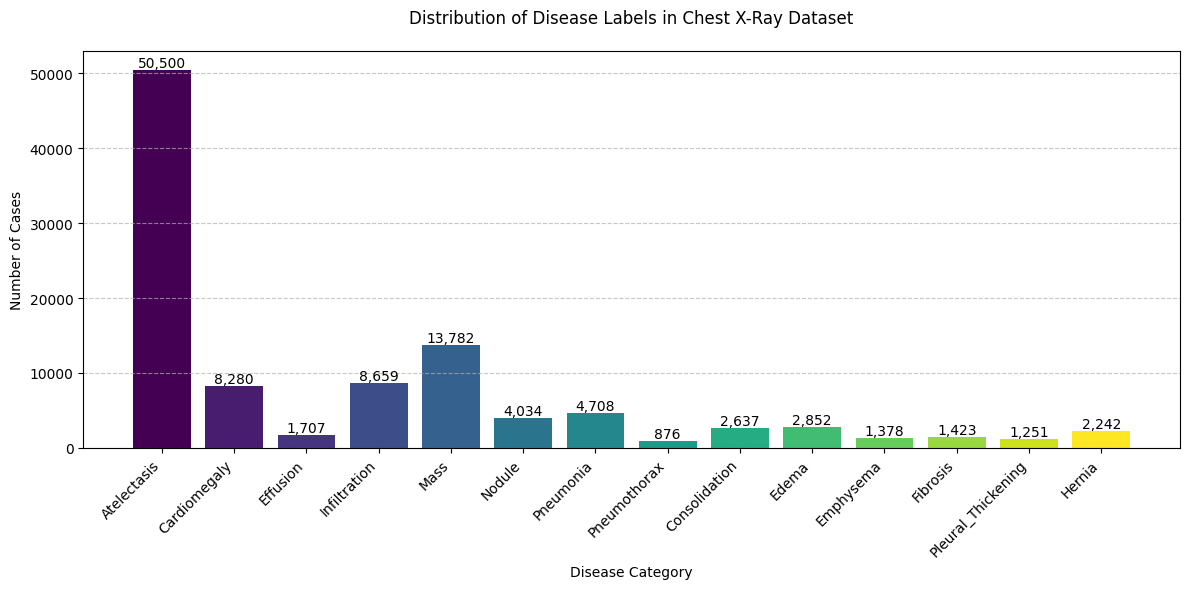

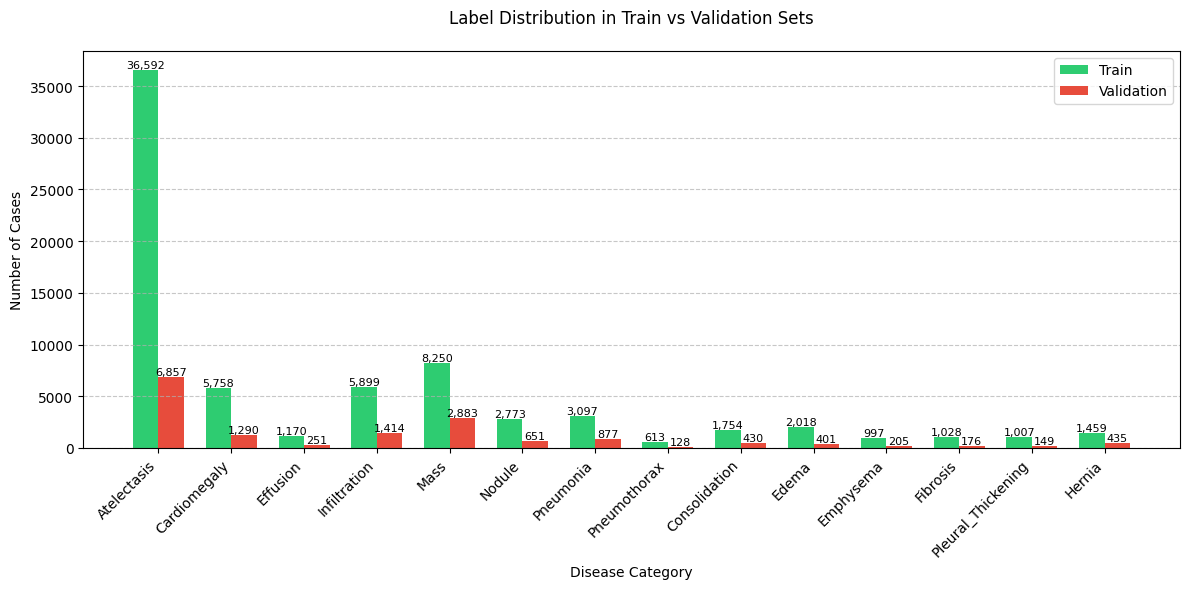

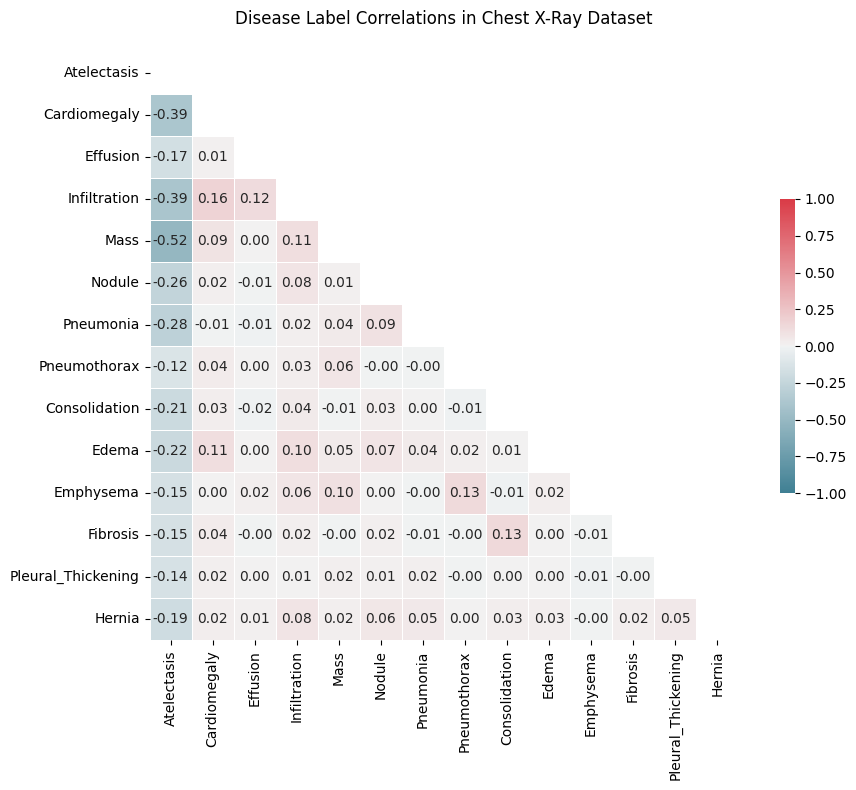

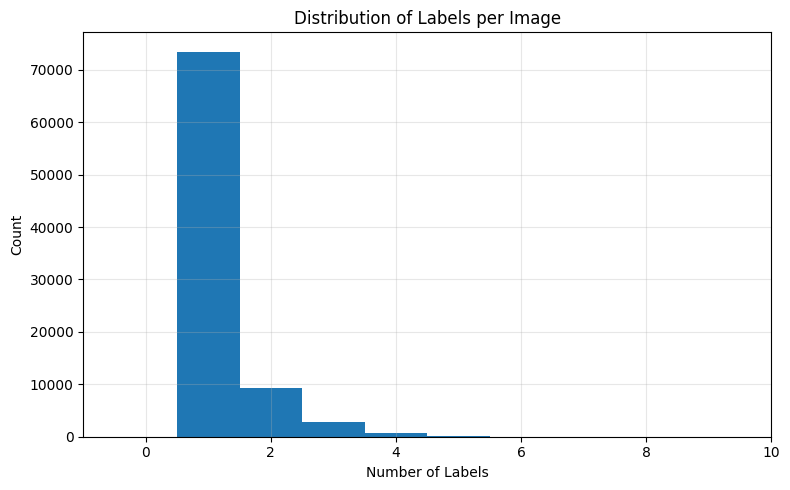

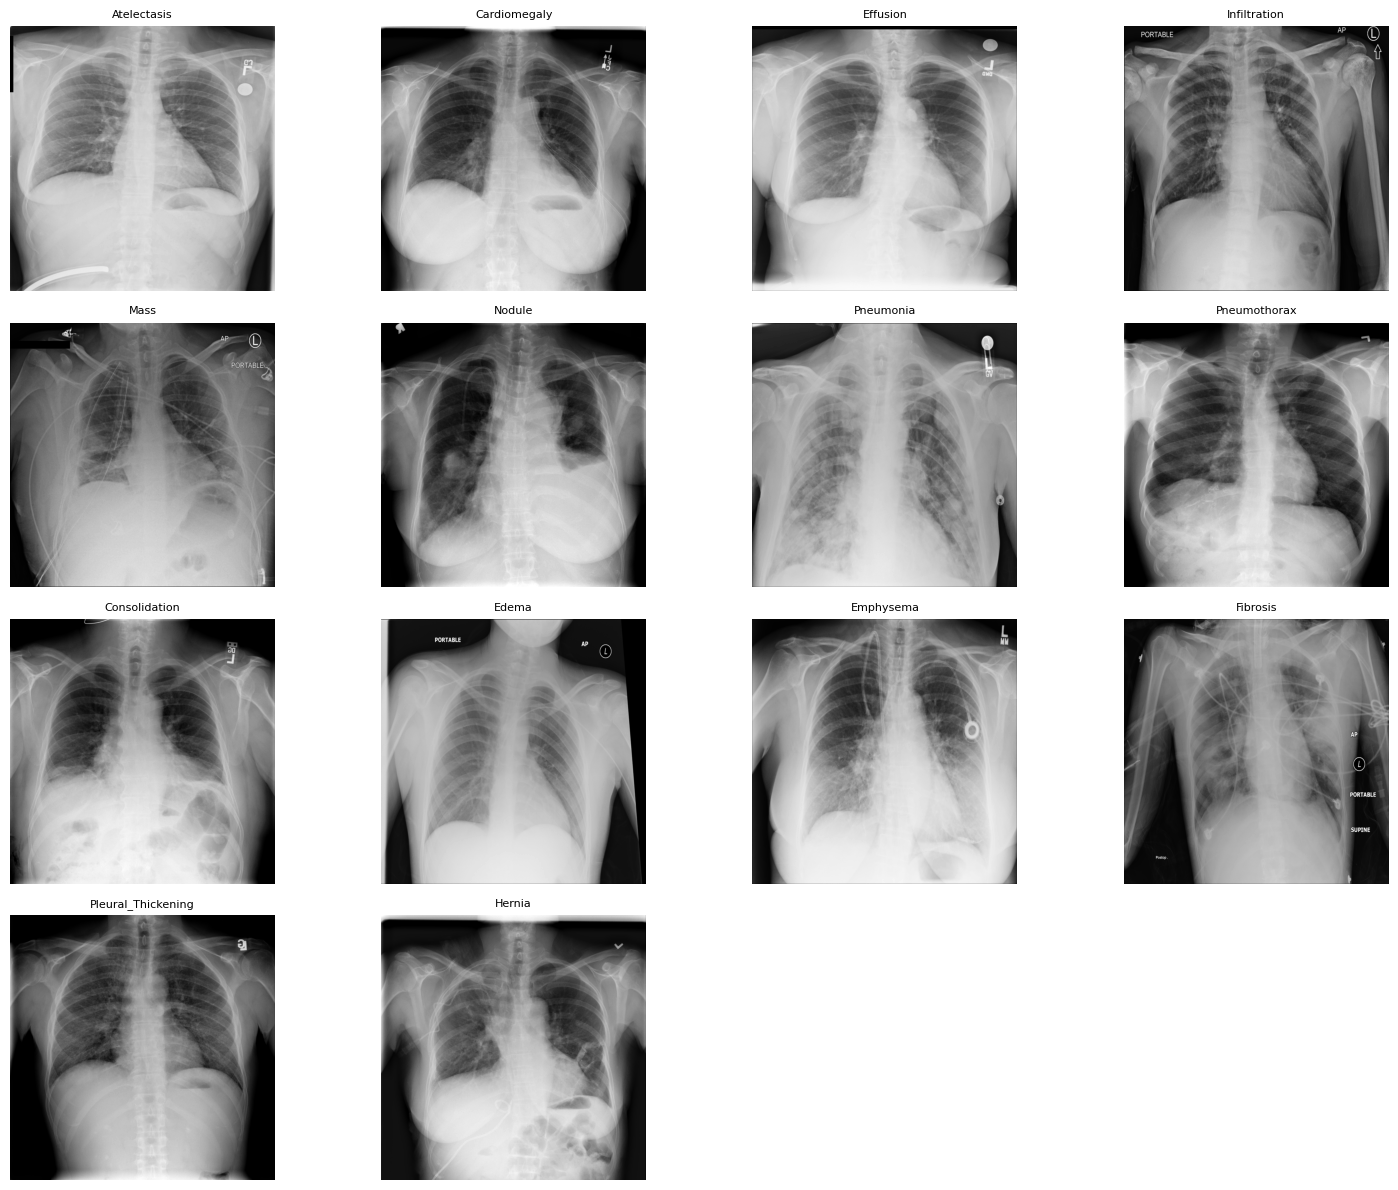

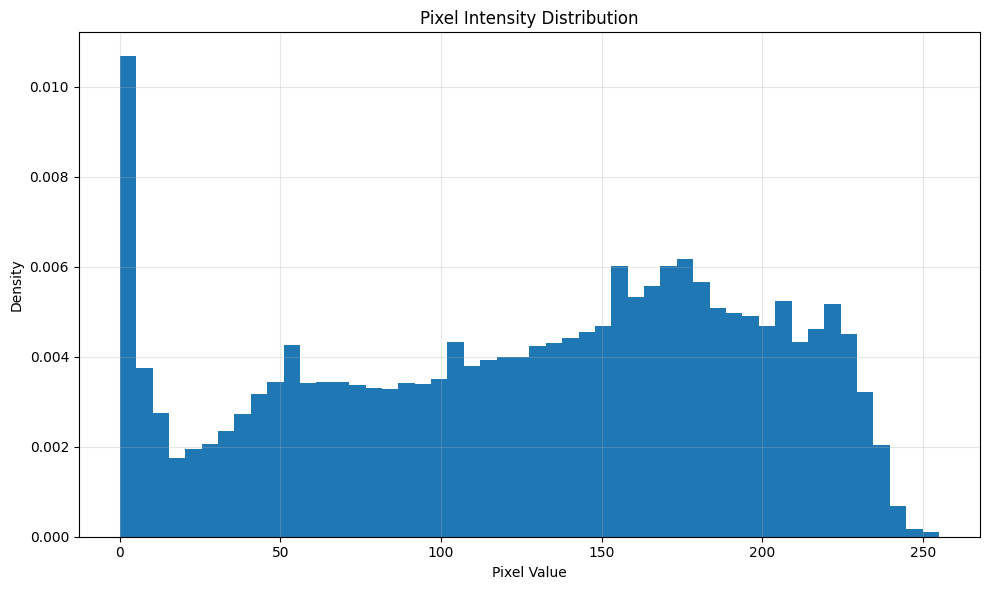

In [4]:
# Assuming we already ran the cell that sets project_root and data_dir
import pandas as pd

from nih_cxr_ai.utils.visualization.dataset_viz import DatasetVisualizer
from nih_cxr_ai.utils.visualization.image_viz import ImageVisualizer


# Load the main dataset
labels_file = data_dir / 'labels.csv'
all_xray_df = pd.read_csv(labels_file)


train_df = pd.read_csv(data_dir / 'train_labels.csv')
val_df = pd.read_csv(data_dir / 'val_labels.csv')

# Initialize visualizers
image_visualizer = ImageVisualizer(data_dir=data_dir)
dataset_visualizer = DatasetVisualizer(all_xray_df, data_dir=data_dir)

# Dataset distribution analysis
dataset_visualizer.plot_label_distribution()
dataset_visualizer.plot_train_val_distribution(train_df, val_df)
dataset_visualizer.plot_label_correlations()
dataset_visualizer.plot_multi_label_distribution()
dataset_visualizer.analyze_missing_data()

#  Show one example of each disease type
image_visualizer.show_examples_by_label(
    all_xray_df, 
    DatasetVisualizer.LABEL_MAPPING,
    num_per_label=1
)

# The following visualization examines the pixel intensity distribution across a random sample of images.
# Note: This can be computationally expensive if the sample size is large (e.g., 1000+ images),
# especially for high-resolution X-rays. Loading and converting many large images into arrays
# can stress system memory and potentially cause the kernel to hang or crash.
#
# For demonstration purposes, we use a small sample_size (e.g., 10). Increasing this number
# can provide a more comprehensive intensity profile but may significantly slow down the notebook
# or consume excessive resources. Adjust as needed based on available hardware and runtime limits.

image_visualizer.plot_intensity_distribution(sample_size=10)
